In [30]:
from post_parser_record import PostParserRecord
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
from wordcloud import WordCloud
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 1:

In [31]:
def contains_tag(tag, fivetags):
  #Simple function to check if a posts tag is contained within the top 5 tags list
  if tag in fivetags:
    matches = (tg for tg in fivetags if tg == tag)
    return matches


In [32]:
def remove_stopwords(lst_words):
  # This method removes stop words from word list
  stop_words = set(stopwords.words('english'))   
  text_remove_stop_words = [w for w in lst_words if not w.lower() in stop_words and w.isalpha()]

  return text_remove_stop_words
  

def find_frequent_tag(post_reader, limit, remove_stop):
  from collections import Counter
  # This methods takes in post_reader and 
  # find the most frequent tags in questions
  # If remove_stop is set to True, remove_stopwords() will be ran
  lst_common_tags = []
  tagtokens = []
  for question_id in post_reader.map_questions:
    question = post_reader.map_questions[question_id]
    # Parses tags and saves them individually to the list tags
    for tag in question.tags:
      tagtokens.append(tag)
  if remove_stop:
    tagtokens = remove_stopwords(tagtokens)
  # This returns the top number (limit) of common words 
  # If limit is not provided then all tokens returned
  Counter = Counter(tagtokens)
  if limit:
    for index in range(limit):
      lst_common_tags.append(Counter.most_common()[index][0])
  if limit == 0:
    return tagtokens
  return lst_common_tags

In [33]:
def grab_questions_with_top_tags(post_reader, top_5_tags):
  articles_with_tags = dict()
  articles_with_tags[top_5_tags[0]] = set()
  articles_with_tags[top_5_tags[1]] = set()
  articles_with_tags[top_5_tags[2]] = set()
  articles_with_tags[top_5_tags[3]] = set()
  articles_with_tags[top_5_tags[4]] = set()
  for question_id in post_reader.map_questions:
    question = post_reader.map_questions[question_id]
    for tag in question.tags:
      matches = contains_tag(tag, top_5_tags)
      if matches:
        for tagmatch in matches: 
          articles_with_tags[tagmatch].add(question_id)  
  return articles_with_tags

In [34]:


def find_frequent_tokens(post_reader, limit, question_list, remove_stop):
  import xml.etree.ElementTree as ET
  from collections import Counter
  # This methods takes in post_reader and 
  # find the most frequent tags in questions
  # If remove_stop is set to True, remove_stopwords() will be ran
  lst_common_tokens = []
  texttokens = []

  for question_id in question_list:
    question = post_reader.map_questions[question_id]
    question_words = []
    # Parses question body words and saves them individually to the list words
    text = question.body
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    tokenizer = RegexpTokenizer(r'\w+')
    question_words = tokenizer.tokenize(text)
    for tok in question_words:
      texttokens.append(tok)
  if remove_stop:
    texttokens = remove_stopwords(texttokens)
  # This returns the top number (limit) of common words 
  # If limit is not provided then all tokens returned
  Counter = Counter(texttokens)
  if limit:
    for index in range(limit):
      lst_common_tokens.append(Counter.most_common()[index][0])
  if limit == 0:
    return question_words
  return lst_common_tokens

In [35]:

post_file_path = "/content/Posts.xml"
post_reader = PostParserRecord(post_file_path)

limit = 5

top_5_tags = find_frequent_tag(post_reader, limit, False)
print(top_5_tags)

# Find articles that have at least one of the top 5 tags
articles_with_top_5_tags = grab_questions_with_top_tags(post_reader, top_5_tags)
# Top 30 common tokens before removing stop words
limit = 30 
# The most common 30 tokens of the most common tag
common_token_list = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[0]] , False)
print(top_5_tags[0])
print(common_token_list)


['united-states', 'copyright', 'united-kingdom', 'criminal-law', 'contract-law']
united-states
['the', 'to', 'a', 'of', 'and', 'I', 'in', 'that', 'is', 'for', 'it', 'or', 'be', 'this', 'not', 'on', 'have', 's', 'as', 'are', 'with', 'an', 'if', 'they', 'was', 'would', 'my', 'quot', 'but', 'by']


### Step 2:

In [36]:
# Top 30 tokens from bodys of posts with one of top 5 tags with stop words removed
#common_tokens_list_sans_stop = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[0]], True)
#print(common_tokens_list_sans_stop)

for index in range(5):
  top_five_tag_tokenlist = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[index]], True)
  print("Tag : " + top_5_tags[index])
  print()
  print(top_five_tag_tokenlist)
  print()

Tag : united-states

['would', 'quot', 'law', 'legal', 'US', 'one', 'question', 'case', 'state', 'like', 'could', 'person', 'company', 'use', 'court', 'States', 'United', 'time', 'get', 'even', 'know', 'also', 'people', 'say', 'may', 'someone', 'without', 'work', 'laws', 'make']

Tag : copyright

['copyright', 'use', 'would', 'work', 'quot', 'like', 'legal', 'license', 'one', 'question', 'website', 'book', 'software', 'game', 'make', 'code', 'want', 'original', 'content', 'law', 'could', 'public', 'using', 'company', 'video', 'without', 'copyrighted', 'example', 'know', 'also']

Tag : united-kingdom

['would', 'UK', 'quot', 'law', 'legal', 'company', 'one', 'time', 'contract', 'could', 'question', 'work', 'like', 'case', 'also', 'person', 'pay', 'use', 'property', 'get', 'data', 'without', 'may', 'know', 'court', 'information', 'take', 'police', 'Act', 'years']

Tag : criminal-law

['would', 'quot', 'law', 'person', 'crime', 'police', 'case', 'criminal', 'one', 'legal', 'question', 'so

Word Cloud

In [37]:
def word_cloud_creator(word_list):
  text = " ".join(word_list)
  wordcloud = WordCloud(width=800, height=800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(text)
 
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  return plt.show()

Tag : united-states



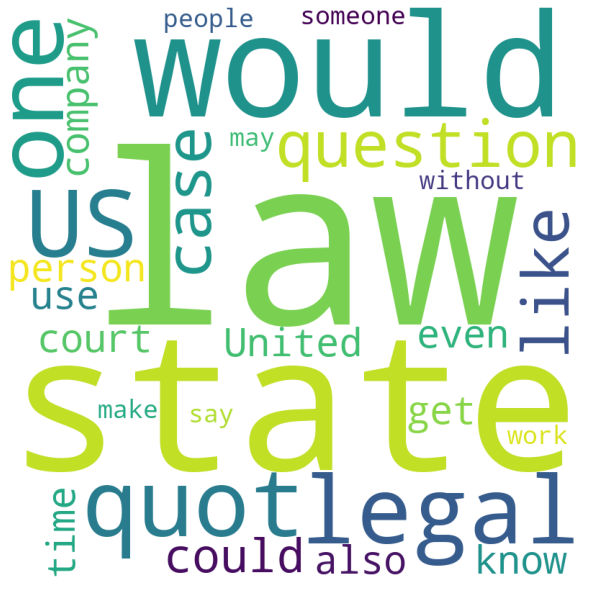


Tag : copyright



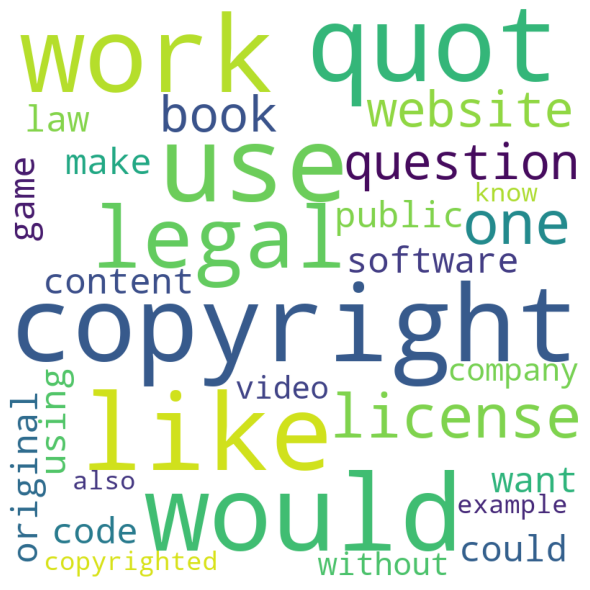


Tag : united-kingdom



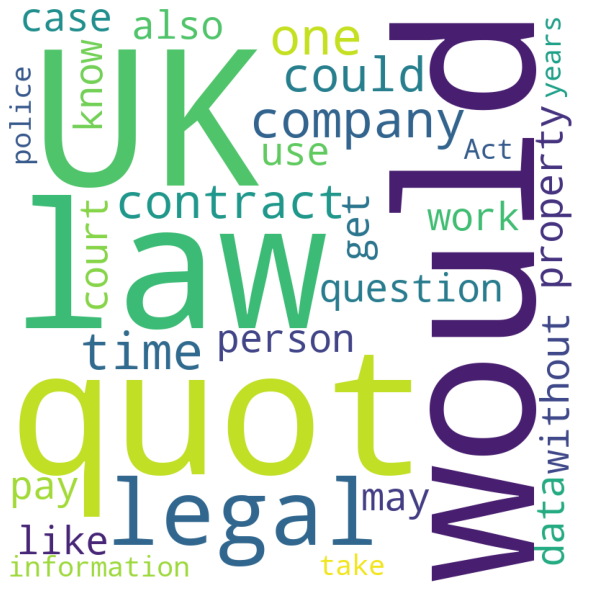


Tag : criminal-law



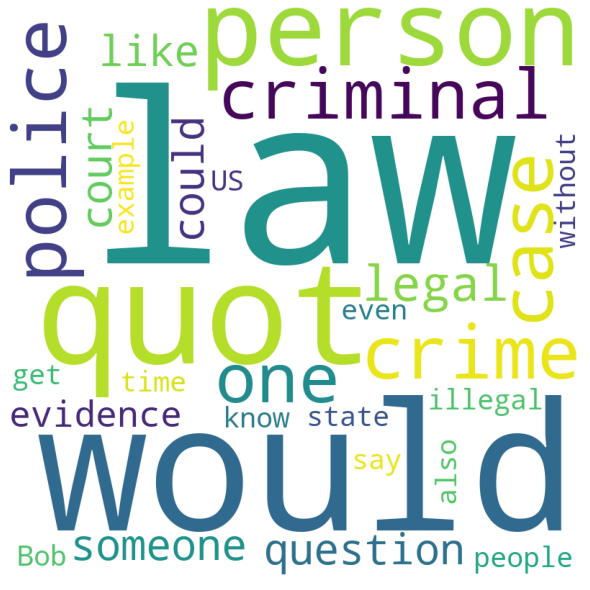


Tag : contract-law



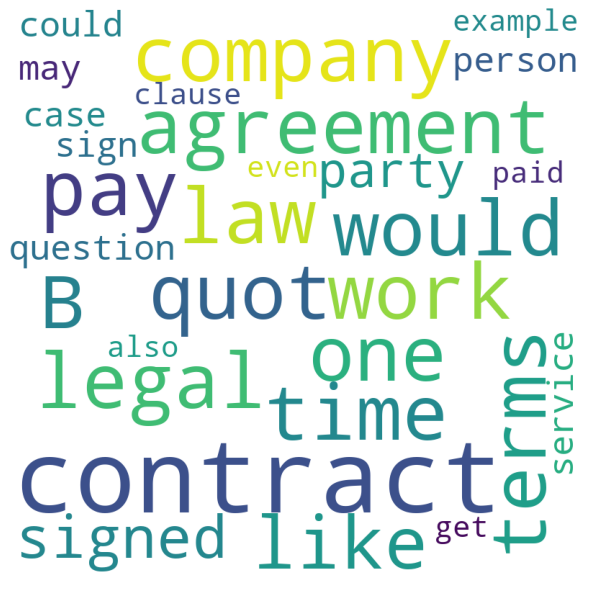

In [38]:
for index in range(5):
  top_five_tag_tokenlist = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[index]], True)
  print("Tag : " + top_5_tags[index])
  print()
  word_cloud_creator(top_five_tag_tokenlist)
  print()

### Step 3: 


In [39]:
def porter_stemmer(lst_words):
  word_stems = []
  ps = PorterStemmer()
  for word in lst_words:
    word_stems.append(ps.stem(word))
  
  return word_stems


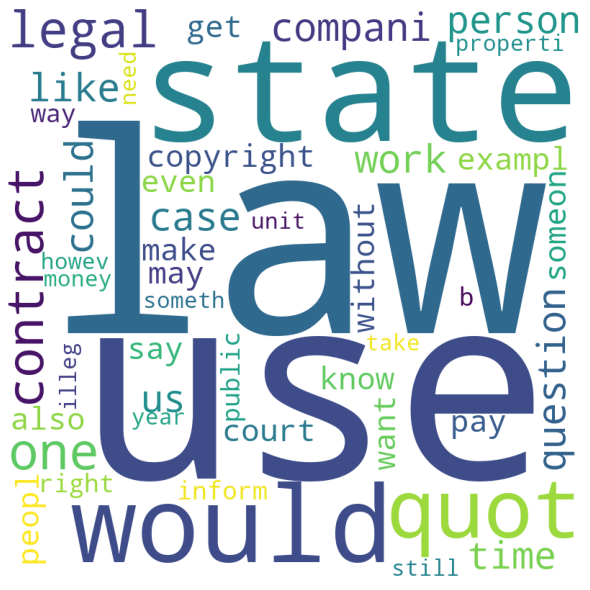

Tag : united-states



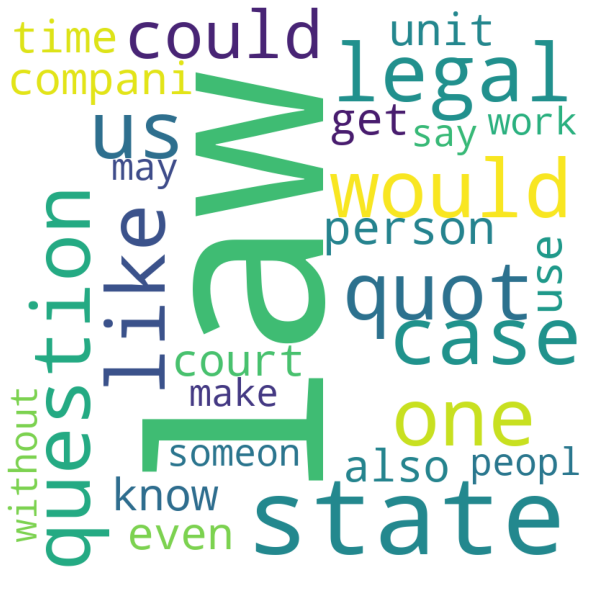


Tag : copyright



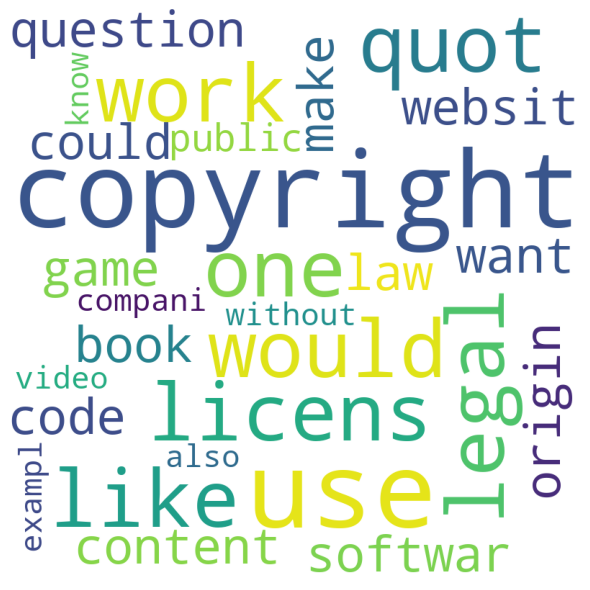


Tag : united-kingdom



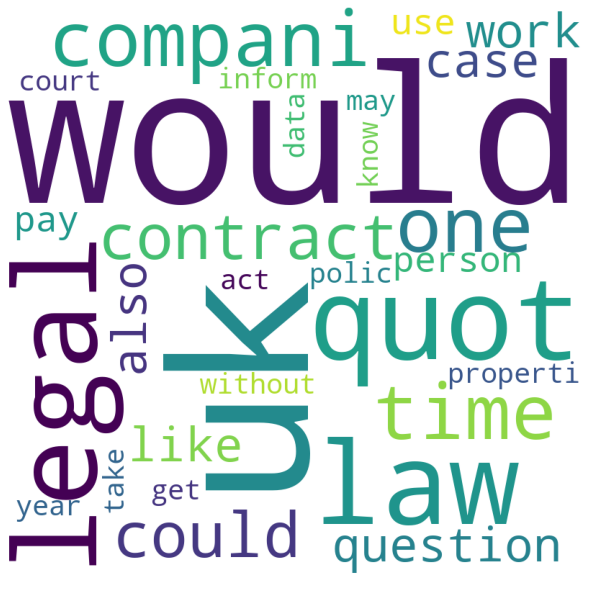


Tag : criminal-law



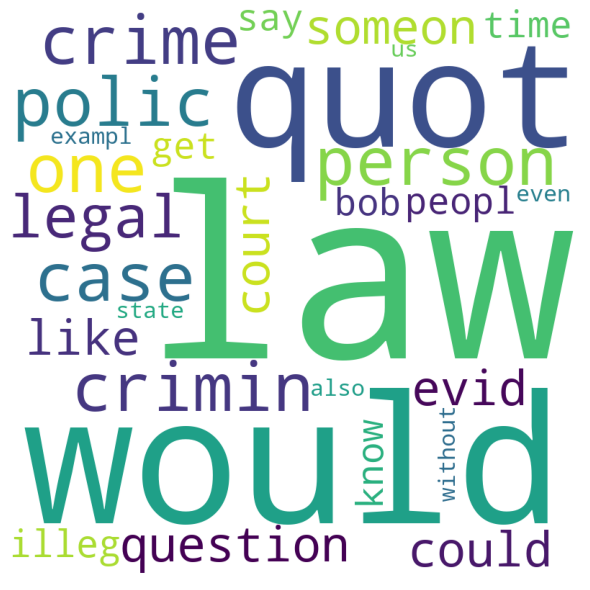


Tag : contract-law



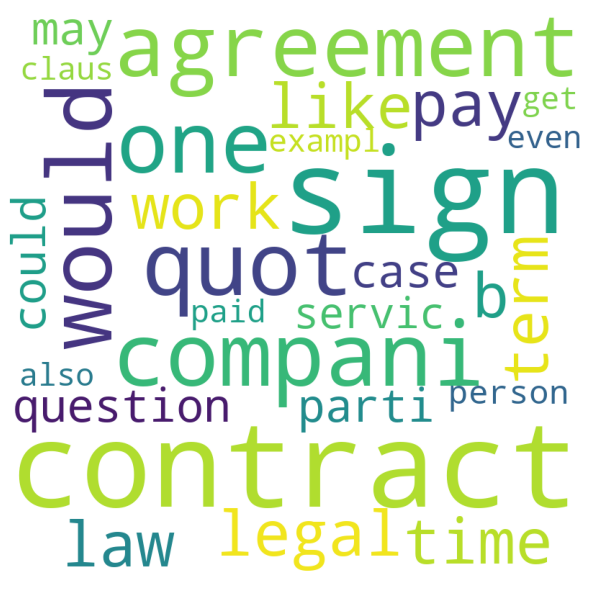

In [40]:
tag_stems = porter_stemmer(common_tokens_list_sans_stop)
# Get word cloud for top tag stems
word_cloud_creator(tag_stems)

for index in range(5):
  top_five_tag_tokenlist = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[index]], True)
  print("Tag : " + top_5_tags[index])
  print()
  tag_stems = porter_stemmer(top_five_tag_tokenlist)
  # Get word cloud for top tag stems
  word_cloud_creator(tag_stems)
  print()


## Step 4:

*Zip*'s Law; Utilized starter code from StackOverFlow

In [41]:
def word_dist_diagram(lst_of_words):
  frequency = {}
  # %% Calculate the frequency of the words inside
  for word in lst_of_words :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

  rank = 1
  column_header = ['Rank', 'Frequency', 'Frequency * Rank']
  df = pd.DataFrame( columns = column_header )
  collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

  for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

  # %% Python visualization with pyplot
  plt.figure(figsize=(10,10))  #to increase the plot resolution
  plt.ylabel("Frequency")
  plt.xlabel("Words")
  plt.xticks(rotation=90)    #to rotate x-axis values

  for word , freq in collection[:30]:
      plt.bar(word, freq, color='grey')    

  return plt.show()

Tag : united-states



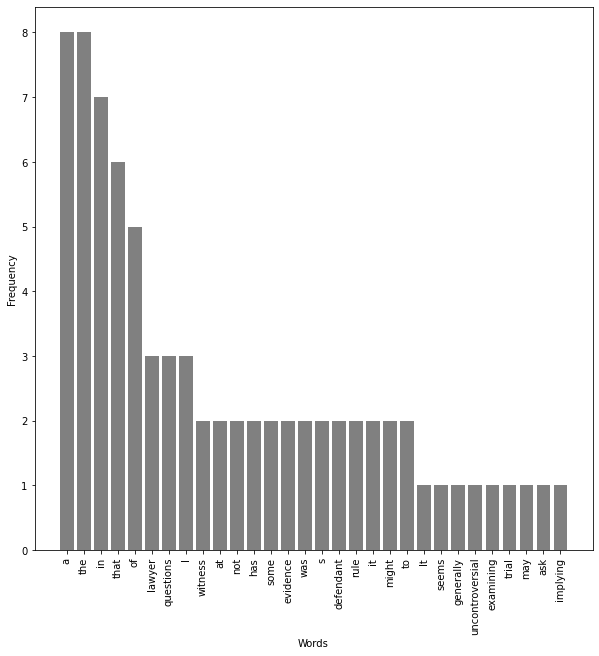


Tag : copyright



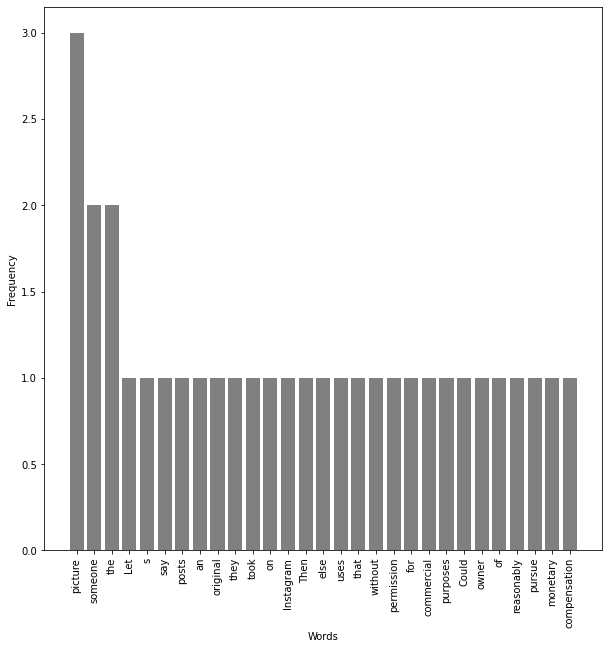


Tag : united-kingdom



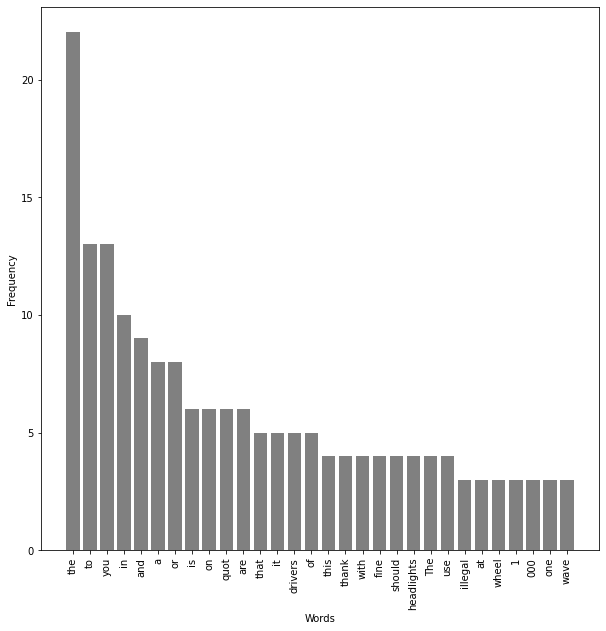


Tag : criminal-law



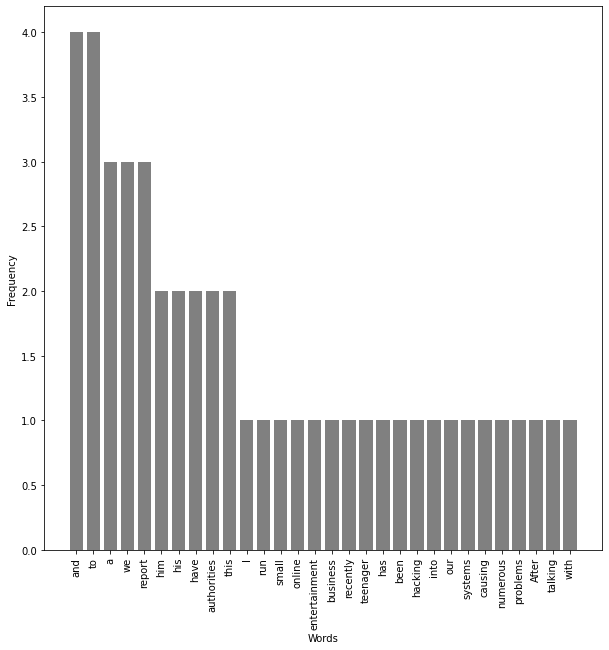


Tag : contract-law



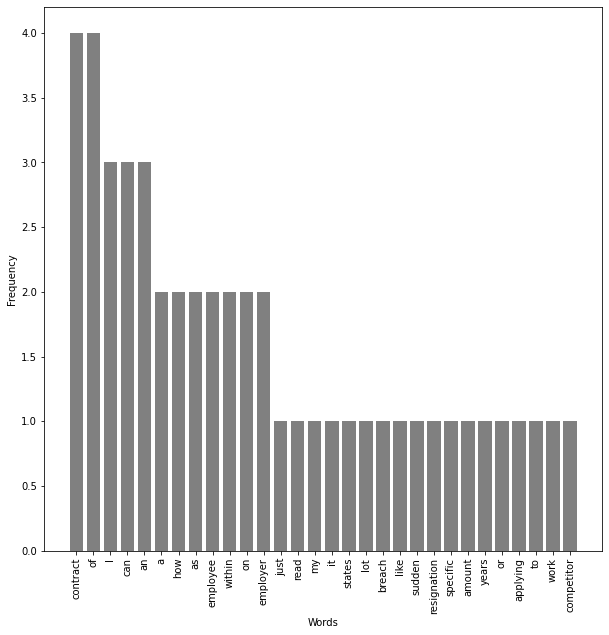

In [42]:
limit = 0
# Limit set to 0 so that all tags are returned
for index in range(5):
  all_tags_list = find_frequent_tokens(post_reader, limit, articles_with_top_5_tags[top_5_tags[index]], False)
  print("Tag : " + top_5_tags[index])
  print()
  word_dist_diagram(all_tags_list)
  print()